**Объект исследования** - Крупный интернет-магазин

**Вводная информация** - Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

**Этапы проекта:**
* Этап №1 - Приоритезация гипотез методами ICE и RICE.
* Этап №2 - Анализ результатов проведенного A/B теста. 

### Приоритизация гипотез.

In [1]:
# Загрузим необходимые для работы библиотеки:
import pandas as pd
import os
import seaborn as sns 
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
# Сохраним данные из csv-файлов в созданных переменных. Выведем на экран все предложенные гипотезы:
pth1='/datasets/hypothesis.csv'
pth2='/Users/User//Downloads/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypothesis = pd.read_csv(pth2)
else:
    print('Проверьте правильность пути к датасету')

pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis['ice'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Выводы:** После назначения приоритета заданным нипотезам методом ICE, на основе таких параметров как: оценка влияния гипотезы на поведение пользователей, уверенность в эффективности предложенных изменений и оценочной стоимости тестирования гипотезы, показало, что наиболее перспективной является uипотеза с индексом 8 - "Запустить акцию, дающую скидку на товар в день рождения" (приоритет 16,2). Следом идут гитозеты под индесами 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (оценки приоритета 13,33 и 11,2, соответственно).

In [4]:
hypothesis['rice'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False))

,Hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


**Выводы:**  Добавив в уранение оценку охвата гипотезы, приоритетность заметно меняется. Самой перспективной, с двойным отрывом от ближайшего конкурента, стала гипотеза с индексом 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (коэффициент приоритета по RICE равен 112). Это произошло, главным образом за счет максимальной оценки охвата аудитории - 10. В то время, как наиболее успешная, с точки зрения оценки ICE, гипотеза с индексом 8 - "Запустить акцию, дающую скидку на товар в день рождения", имеет оценку охвата всего лишь единицу.

### Анализ A/B-теста

In [5]:
# Сохраним данные из второго csv-файла в переменной orders. Выведем на экран первые 5 строк датафрейма:
pth3='/datasets/orders.csv'
pth4='/Users/User//Downloads/datasets/orders.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3)
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4)
else:
    print('Проверьте правильность пути к датасету')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# Сохраним данные из третьего csv-файла в переменной visitors. Выведем на экран первые 5 строк датафрейма:
pth5='/datasets/visitors.csv'
pth6='/Users/User//Downloads/datasets/visitors.csv'

if os.path.exists(pth5):
    visitors = pd.read_csv(pth5)
elif os.path.exists(pth6):
    visitors = pd.read_csv(pth6)
else:
    print('Проверьте правильность пути к датасету')

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Выведем общую информацию о датафреймах:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

**Пропуски отсутствуют**

In [8]:
print('Количество дубликатов в датафрейме orders:', orders.duplicated().sum())
print('Количество дубликатов в датафрейме visitors:', visitors.duplicated().sum())

Количество дубликатов в датафрейме orders: 0
Количество дубликатов в датафрейме visitors: 0


**Явные дубликаты отсутствуют**

       visitors
group          
A         18736
B         18916
...
group
A    503
B    586
Name: visitorId, dtype: int64
...
Дата начала теста: 2019-08-01
Дата окончания теста: 2019-08-31
...
group    58
dtype: int64
...


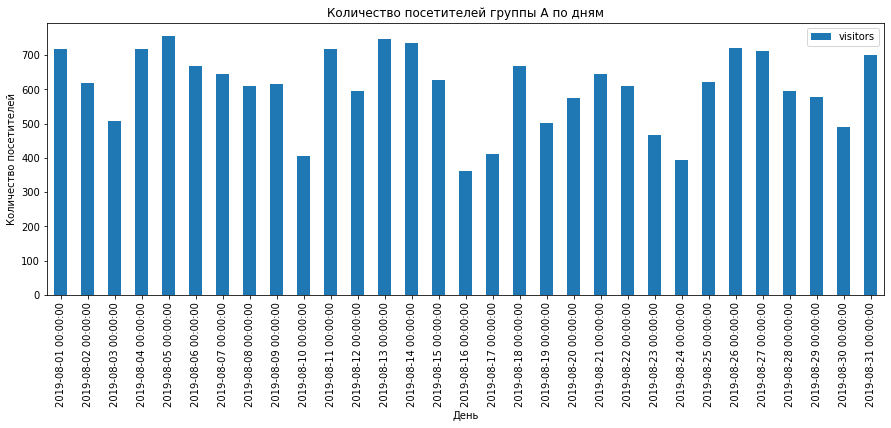

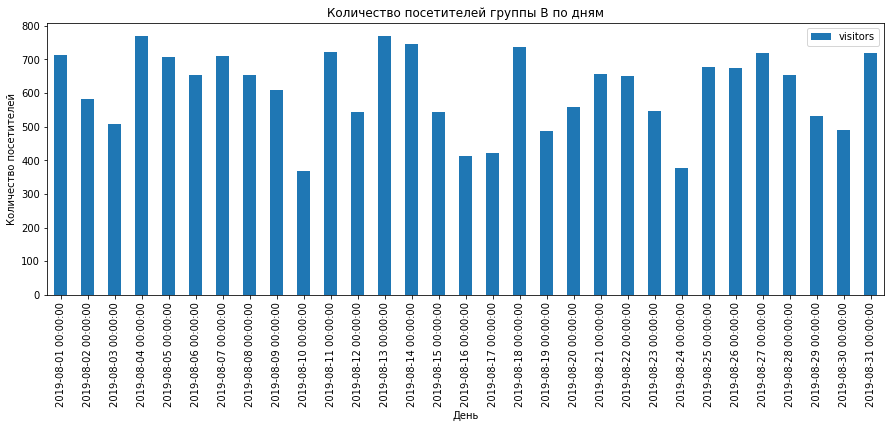

In [9]:
# Посмотрим на распределение участников AB-теста по группам:
print(visitors.groupby('group').sum())
print('...')

# Посмотрим на распределение участников AB-теста, совершивших хотя бы одну покупку, по группам:
print(orders.groupby('group')['visitorId'].nunique())
print('...')

# Определим период проведения теста:
print('Дата начала теста:', visitors['date'].dt.date.min())
print('Дата окончания теста:', visitors['date'].dt.date.max())
print('...')

# Проверяем сколько пользователей попало одновременно в обе группы:
print(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count())
print('...')

# Отобразим динамику посетителей группы А по дням:
visitors.query('group == "A"').pivot_table(index='date', values='visitors'
            ).sort_values(by='date', ascending=True)\
            .plot(kind='bar', figsize=(15, 5), title='Количество посетителей группы A по дням', 
            xlabel='День', ylabel='Количество посетителей')
plt.show()

# Отобразим динамику посетителей группы B по дням:
visitors.query('group == "B"').pivot_table(index='date', values='visitors'
            ).sort_values(by='date', ascending=True)\
            .plot(kind='bar', figsize=(15, 5), title='Количество посетителей группы B по дням', 
            xlabel='День', ylabel='Количество посетителей')
plt.show()

**2.1. Построим график кумулятивной выручки по группам:**

In [10]:
# создаем массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах: 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [11]:
# Проверим, корректно ли был создан датафрейм cumulativeData.
# Посмотрим, совпадают ли минимальные и максимальные даты нового и исходных датафреймов (были определены ранее):
print('Минимум в cumulativeData:', cumulativeData['date'].dt.date.min())
print('Максимум в cumulativeData:', cumulativeData['date'].dt.date.max())

Минимум в cumulativeData: 2019-08-01
Максимум в cumulativeData: 2019-08-31


**Крайние даты нового и исходных датафреймов - идентичны!**

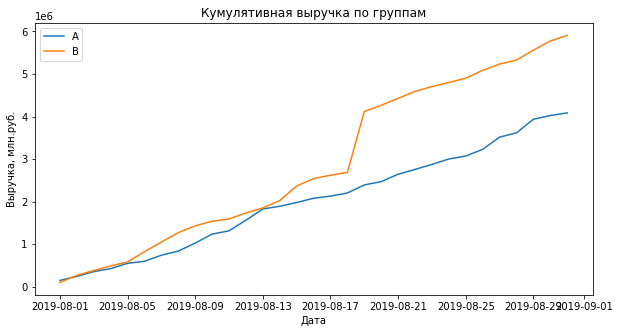

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки по группам
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Кумулятивная выручка по группам")
plt.ylabel("Выручка, млн.руб.")
plt.xlabel("Дата")
plt.legend()
plt.show()

**Выводы:** 

* Выручка у группы А равномерно увеличивается в течение всего теста. 
* Однако график выручки группы В имеет резкий рост в середине эксперимента. Это может быть признаком либо резкого роста числа заказов, либо о появления очень дорогих заказов в выборке.

**2.2. Построим график кумулятивного среднего чека по группам:**

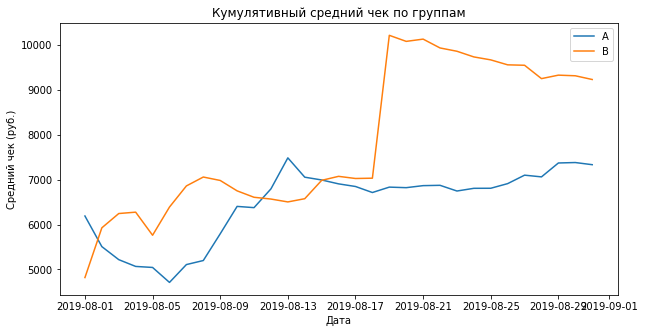

In [13]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек по группам")
plt.ylabel("Средний чек (руб.)")
plt.xlabel("Дата")
plt.legend()
plt.show()

**Выводы:**

* Средний чек группы А тоже становится боле-менее равномерным ближе к концу теста
* Однако у группы В также виден резкий скачок вверх. Скорее всего, ближе к концу теста, туда попали очень большие заказы, что логично объясняет данный всплеск. В связи с этим, нужно больше данных, чтобы определить реальный средний чек данной группы.

**2.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A:**

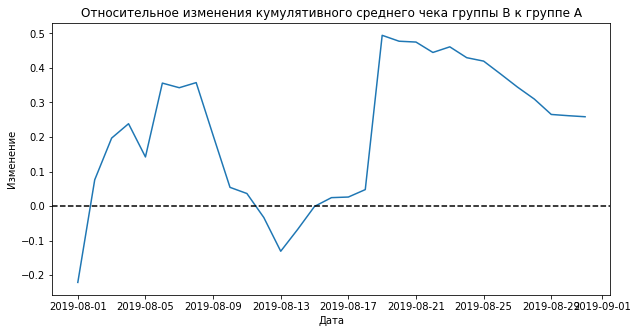

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.title("Относительное изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel("Изменение")
plt.xlabel("Дата")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Выводы:** На графике отчетливо видно несколько резких скачков то вверх, то вниз. Это подтверждает наличие выбросов (аномально дорогих покупок).

**2.4. Построим график кумулятивного среднего количества заказов на посетителя по группам:**

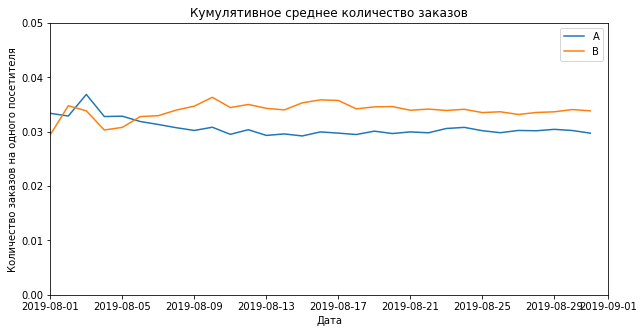

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группам:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,9,1), 0, 0.05])
plt.title("Кумулятивное среднее количество заказов")
plt.ylabel("Количество заказов на одного посетителя")
plt.xlabel("Дата")
plt.legend()
plt.show()

**Выводы:** 
* На выходе мы получили симметричный график. В начале цикла (до 5 августа) обе группы шли по схожему графику, с небольшим опережением группы А. 
* Однако  конверсия группы А началадемонстрировать резкое снижение и к 13 августа зафиксировалась в районе 0,030 без резких рывков. 
* В свою очередь, группа В наоборот - продемонстрировала рост, начиная с 5 августа, и, к середине теста, располажилась на уровне 0,035.

**2.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

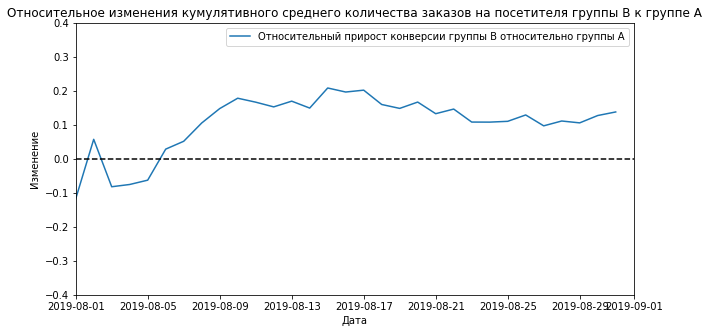

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title("Относительное изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel("Изменение")
plt.xlabel("Дата")
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,9,1), -0.4, 0.4])

plt.show()

**Выводы:** 

* В начале теста, группа В уступала группе А.
* Однако уже буквально на третий день начала демонстрировать рост и к 15 августа выходит пик (в сравнении с группой А), после чего слегка опускается и стабилизируется.

**2.6. Построим точечный график количества заказов по пользователям:**

In [17]:
# Подсчитаем количество заказов по пользователям:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


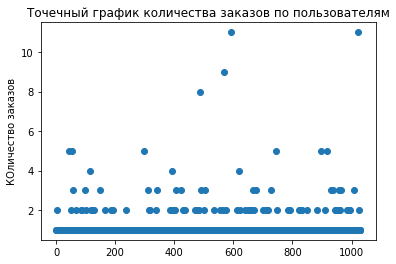

In [18]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("КОличество заказов")
plt.show()

**2.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:**

In [19]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Выводы:**

* Не более 5% пользователей совершило 2 покупки и не более 1% оформили 4 и более заказа.
* Т.к. исходя из графика, 4 заказа оформили всего 3 пользователя, ограничимся верхней границей в 3 заказа. Пользователей, с 4 и более заказами признаем аномалиями.

**2.8. Построим точечный график стоимостей заказов:**

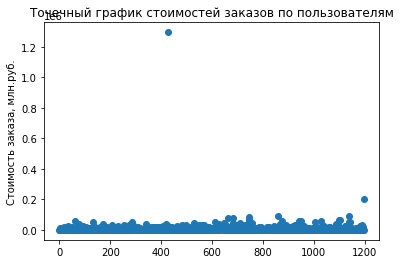

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylabel("Стоимость заказа, млн.руб.")
plt.show()

**2.9. Посчитаем 95-й и 99-й перцентили стоимости заказов:**

In [21]:
print(np.percentile(orders['revenue'], [95, 97, 99]))

[28000.  35485.  58233.2]


**Выводы:**

* Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.
* На графике видно 2 четкие аномалии - на отметках ~ 200 000 и 1 300 000 рублей.
* Принято решение считать за аномальные, значения выше 97 персентиля (как промежуточный показатель между 95 и 97м) , т.к. они могут значительно исказить данные.

**2.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

In [22]:
# Подготовим данные:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

**Выдвинем гипотезы:**

* H0: различия в количестве заказов между группами отсутствуют.
* H1: различия в количестве заказов между группами присутствуют.

In [23]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if (float(stats.mannwhitneyu(sampleA, sampleB)[1]) > 0.05):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 
print('Относительный рост среднего числа заказов группы B к результатам группы А составляет', "{0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Отвергаем нулевую гипотезу
Относительный рост среднего числа заказов группы B к результатам группы А составляет 13.81%


**Выводы:**

* По «сырым» данным различия в среднем числе заказов между группами A и B - имеются.
* Показатель p-value значительно меньше 0,05, что дает нам полное право отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. 
* Относительный прирост среднего числа заказов группы B к результатам группы А составляет 13.81%

**2.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:**

**Зададим гипотезы:**

* H0: различия в среднем чеке заказа между клиентами из разных групп отсутствуют.
* H1: различия в среднем чеке заказа между клиентами из разных групп присутствуют.

In [24]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if (float('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])) > 0.05):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 
print('Относительный рост среднего чека группы B к среднему чеку группы А составляет','{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный рост среднего чека группы B к среднему чеку группы А составляет 25.87%


**Выводы:**
* P-value больше 0,05 – следовательно статистически значимых отличий в среднем чеке между группами нет. 
* Относительное различие между средними чеками сегментов составляет 25,87%

**2.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

In [25]:
# Очистим данные от аномальных значений:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >= np.percentile(orders['revenue'], 97)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64
42


**Всего выявлено 42 аномальных пользователя**

In [26]:
# Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.014
15.49%


**Выводы:**
* Результаты по среднему количеству заказов практически не изменились. 
* P-значение уменьшилось на 0,003. Статистически значимые различия в среднем числе заказов между группами A и B - по прежнему имеются.
* Относительный рост среднего числа заказов группы B к группе А - увеличился на 1,65%

**2.13. Посчитаем статистическую значимость различий в среднем чеке между группами по «очищенным» данным:**

In [27]:
# Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей:
print(
    '{0:.2f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.87
2.47%


**Выводы:**
* Результаты по среднему чеку, наоборот, существенно преобразовались. 
* P-значение увеличилось на 0,16. Что усилило тот факт, что статистически значимых отличий по среднему чеку между группами нет.
* А вот относительный рост среднего числа заказов группы B к группе А - сократился аж на 23,58% и в итоге составил 2,29%. Это вполне подтверждает выявленные ранее на графиках, аномальные скачки в поведении кривой группы B.

**2.14. Принимаем решение по результатам теста:**

* Имеет место наличие статистически значимых различий по среднему количеству заказов между группами A и B, причем как по «сырым», так и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами - ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами дает четкое представление о том, что результаты группы B в значительной степени превосходят аналогичные показатели группы А.
* График различия среднего чека свиделеьствует о том, что результаты группы B резко выросли в районе 20 августа, за счет аномально дорогой продажи общей суммой примерно 1,2 млн.руб. Дальнейшая кривая логично показывает небольшой спад (за счет нормальзации средней стоимости заказов).

**Подводя итог, опираясь на вышеуказанные факты, тест следует остановить и признать его успешным. Группа B статистически значимо лучше группы A по обеим метрикам, а график конверсии говорит о стабилизации результата.**